# Ship Detection in the Port of Los Angeles (POLA)

In this notebook the labelled dataset
https://www.kaggle.com/rhammell/ships-in-satellite-imagery
is used to train a model to detect the presence of ships in the Port of Los Angeles.

I have also used 
https://www.kaggle.com/byrachonok/keras-for-search-ships-in-satellite-image
as a guide for the training of the machine learning model

In [1]:
# Let's see if it will import:
with open('POLA_vis_images.txt', 'r') as file:  
    POLA_tifs = [tif.rstrip() for tif in file.readlines()]

In [3]:
import json, sys, random
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.


In [5]:
path = '..//..//..//Prep_Analysis//'

In [6]:
from PIL import Image, ImageDraw 

In [7]:
from matplotlib import pyplot as plt

In [9]:
with open(path+'/ships-in-satellite-imagery/shipsnet.json') as f:
    dataset = json.load(f)
    f.close()

In [10]:
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

In [17]:
# Check out the input data size:
input_data.shape

(4000, 19200)

The input data here are the 4000 labelled images of ships (and not ships)
Each image has been rolled out into a vector of 19200 elements (originally 80x80 RGB images)

In [19]:
n_layer = 3 # color channel (RGB)
width = 80
height = 80
X = input_data.reshape([-1, n_layer, width, height])
X[0].shape

(3, 80, 80)

In [21]:
# get one channel
pic = X[0]

r = pic[0]
g = pic[1]
b = pic[2]

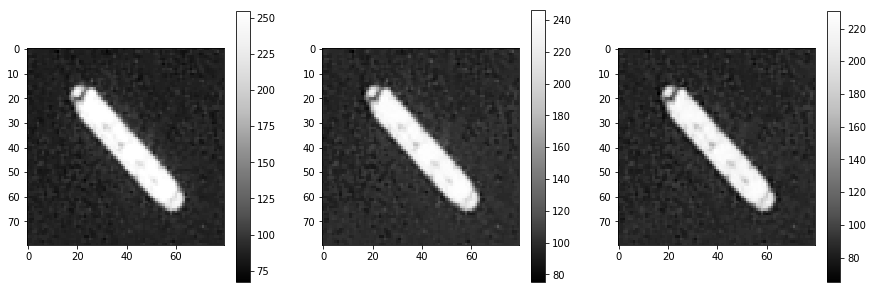

In [64]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('Greys_r')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(r)
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(g)
plt.colorbar()
plt.subplot(1, 3, 3)
plt.imshow(b)
plt.colorbar()

plt.show()


In [48]:
# Output data is a single vector of length 4000 elements
print('Shape of output_data is : {}'.format(output_data.shape))
output_data

Shape of output_data is : (4000,)


array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

The 'output_data' variable contains a 1 or 0 (ship or not) label for each of the 4000 images

In [51]:
print('Number of 1s is: {}'.format(sum(output_data)))

Number of 1s is: 1000


In [52]:
# Therefore there are 3000 non-ships and 1000 ships

Preparing the data for training:

In [59]:
# Output encoding - convert values to vectors of size 1x2, i.e. two categories and encode to which it belongs
y = np_utils.to_categorical(output_data, 2)

In [61]:
# Shuffle all indexes
indexes = np.arange(4000)
np.random.shuffle(indexes)

In [63]:
# Indexes are now randomly assigned
indexes

array([2299,  282,  586, ...,  295,  666,  461])

In [55]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [56]:
# Normalize the data
X_train = X_train / 255

Training the model:

In [67]:
np.random.seed(55)

In [68]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))


In [69]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Train on 3200 samples, validate on 800 samples
Epoch 1/18
 - 55s - loss: 0.4332 - acc: 0.8091 - val_loss: 0.2950 - val_acc: 0.8962
Epoch 2/18
 - 55s - loss: 0.2438 - acc: 0.8959 - val_loss: 0.2691 - val_acc: 0.8662
Epoch 3/18
 - 60s - loss: 0.2152 - acc: 0.9103 - val_loss: 0.1757 - val_acc: 0.9287
Epoch 4/18
 - 58s - loss: 0.1675 - acc: 0.9306 - val_loss: 0.1486 - val_acc: 0.9437
Epoch 5/18
 - 53s - loss: 0.1387 - acc: 0.9463 - val_loss: 0.1023 - val_acc: 0.9650
Epoch 6/18
 - 54s - loss: 0.1262 - acc: 0.9566 - val_loss: 0.0748 - val_acc: 0.9750
Epoch 7/18
 - 52s - loss: 0.1088 - acc: 0.9609 - val_loss: 0.0913 - val_acc: 0.9712
Epoch 8/18
 - 52s - loss: 0.1004 - acc: 0.9678 - val_loss: 0.0897 - val_acc: 0.9675
Epoch 9/18
 - 54s - loss: 0.0844 - acc: 0.9716 - val_loss: 0.0584 - val_acc: 0.9775
Epoch 10/18
 - 55s - loss: 0.0804 - acc: 0.9719 - val_loss: 0.0689 - val_acc: 0.9738
Epoch 11/18
 - 53s - loss: 0.0828 - acc: 0.9716 - val_loss: 0.0569 - val_acc: 0.9825
Epoch 12/18
 - 53s - loss: 

In [70]:
image = Image.open(path+'images//'+POLA_tifs[0])
pix = image.load()

In [71]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [72]:
# create vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [73]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

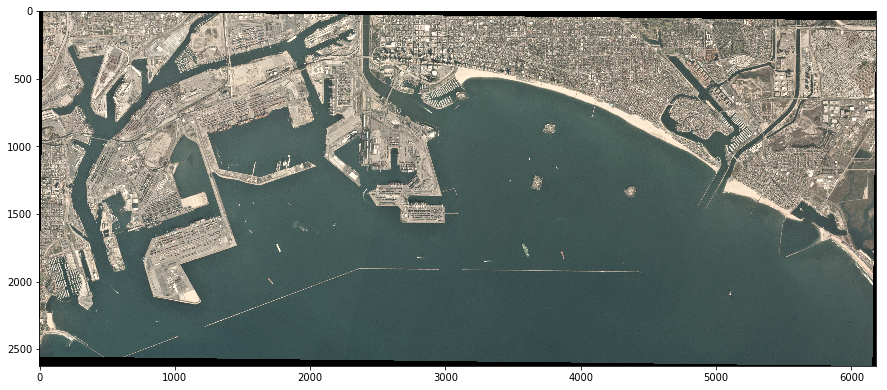

In [74]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [75]:
picture_tensor = picture_tensor.transpose(2,0,1)

In [76]:
# Functions for searching image:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1


X:2110 Y:0  [[0.07051788 0.92948216]]


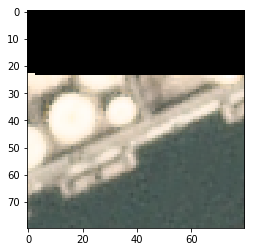

X:4630 Y:290  [[0.02824909 0.971751  ]]


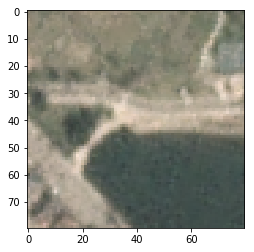

X:710 Y:310  [[0.05785225 0.9421477 ]]


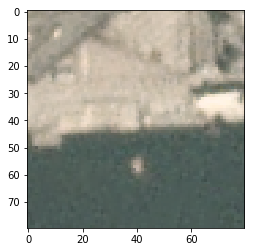

X:1250 Y:330  [[0.02123419 0.9787658 ]]


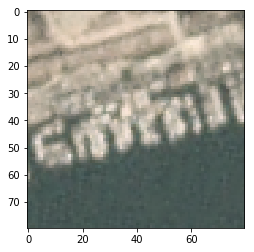

X:1090 Y:380  [[0.04393485 0.9560651 ]]


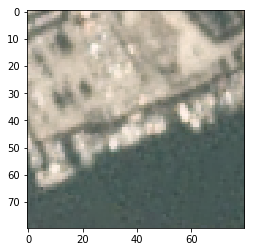

X:1070 Y:1010  [[0.06660128 0.93339866]]


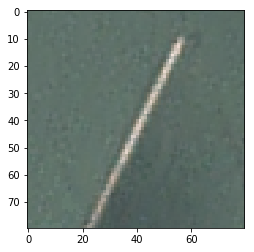

X:1980 Y:1110  [[0.08753849 0.9124615 ]]


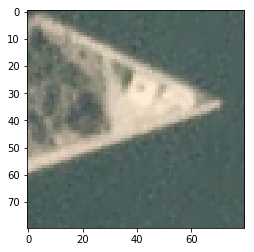

X:6000 Y:1130  [[0.05076512 0.9492349 ]]


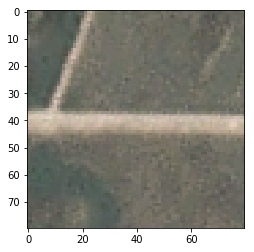

X:1580 Y:1240  [[0.08604112 0.9139589 ]]


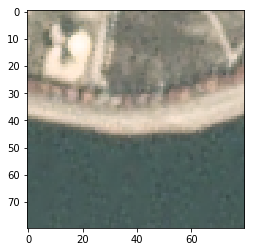

X:2990 Y:1280  [[0.07415492 0.925845  ]]


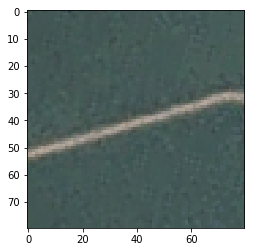

X:2390 Y:1300  [[0.09765542 0.9023445 ]]


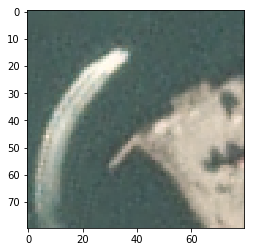

X:3000 Y:1460  [[0.01201323 0.98798674]]


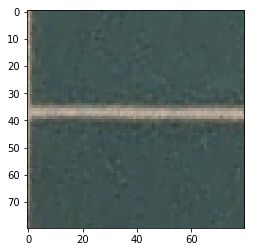

X:240 Y:1470  [[0.03254303 0.96745694]]


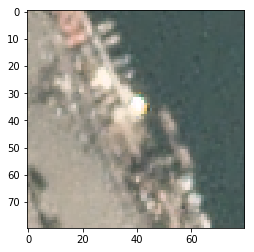

X:5550 Y:1500  [[0.02064121 0.97935885]]


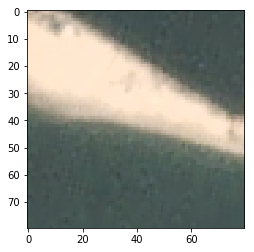

X:1920 Y:1580  [[0.05377492 0.9462251 ]]


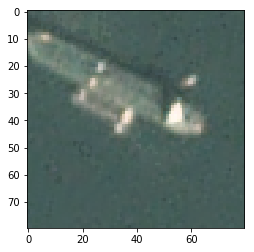

X:1730 Y:1710  [[8.655000e-04 9.991345e-01]]


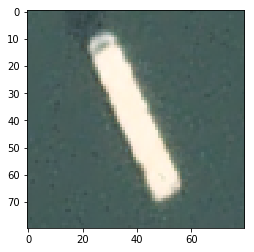

X:5560 Y:1740  [[0.08601322 0.91398674]]


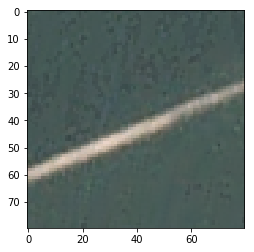

X:3830 Y:1760  [[0.00378282 0.9962172 ]]


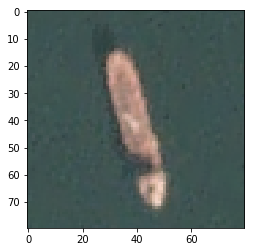

X:1080 Y:1800  [[0.06685768 0.9331423 ]]


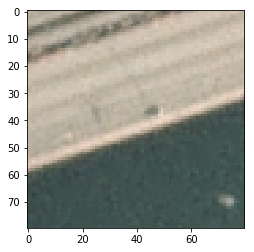

X:2330 Y:1860  [[0.01947817 0.9805218 ]]


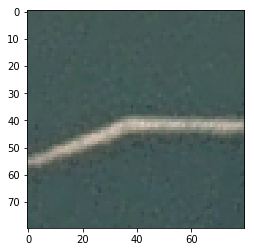

X:2420 Y:1860  [[0.03369501 0.966305  ]]


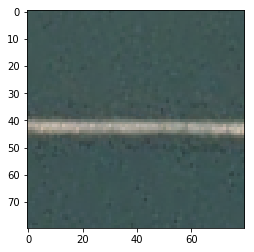

X:2530 Y:1860  [[0.09643082 0.90356916]]


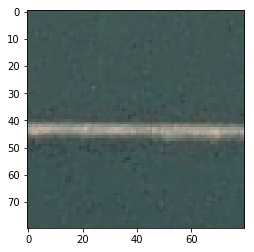

X:2620 Y:1860  [[0.09674037 0.9032596 ]]


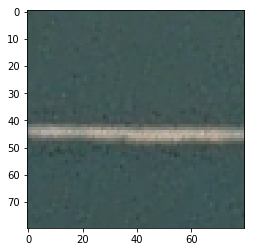

X:2720 Y:1870  [[0.07354767 0.92645234]]


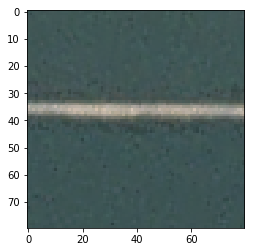

X:2810 Y:1870  [[0.00523143 0.9947686 ]]


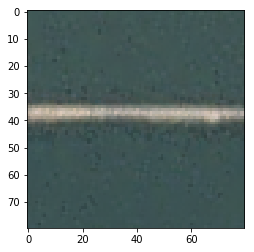

X:2900 Y:1870  [[0.0829764 0.9170236]]


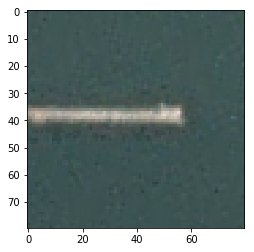

X:3110 Y:1870  [[0.01749593 0.98250407]]


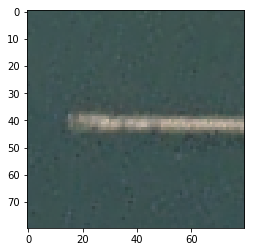

X:3200 Y:1870  [[0.0047167 0.9952833]]


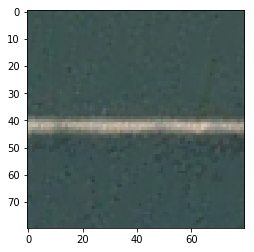

X:3290 Y:1870  [[0.08039742 0.9196026 ]]


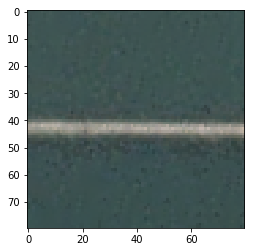

X:3590 Y:1880  [[0.06935154 0.93064845]]


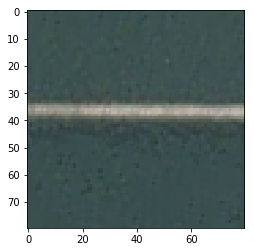

X:3680 Y:1880  [[0.00855844 0.99144155]]


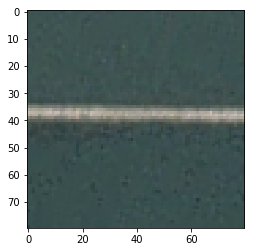

X:3770 Y:1880  [[0.01938045 0.98061955]]


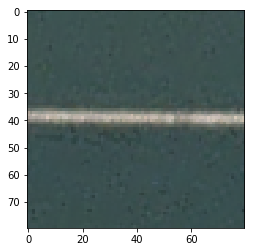

X:3860 Y:1880  [[0.02648319 0.97351676]]


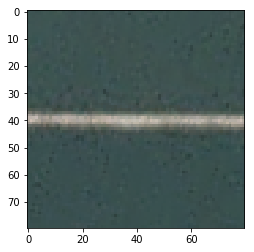

X:3950 Y:1880  [[0.00476185 0.9952382 ]]


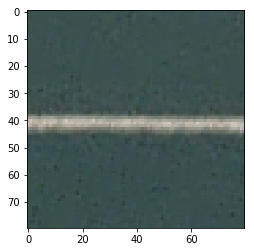

X:4040 Y:1880  [[0.006759  0.9932411]]


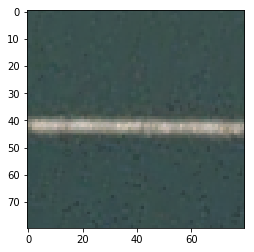

X:4130 Y:1880  [[0.03781292 0.9621871 ]]


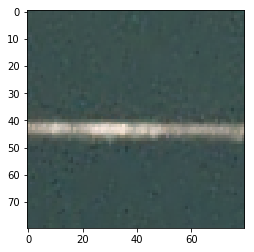

X:4220 Y:1880  [[0.09462927 0.9053708 ]]


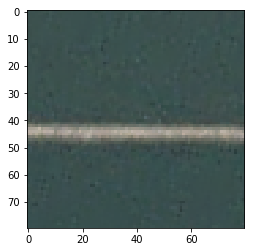

X:2240 Y:1890  [[0.08068153 0.91931844]]


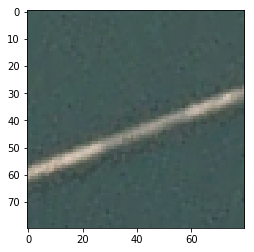

X:4350 Y:1890  [[0.07358197 0.92641807]]


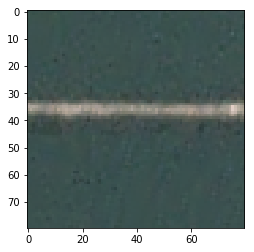

X:2140 Y:1930  [[0.03463595 0.96536404]]


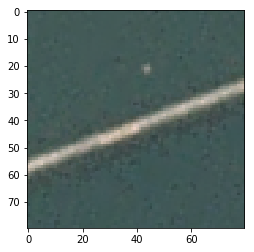

X:1670 Y:1950  [[0.08736365 0.91263634]]


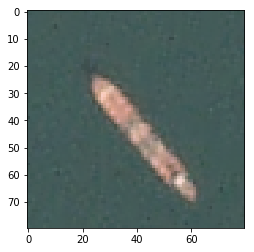

X:2050 Y:1960  [[0.06324811 0.93675196]]


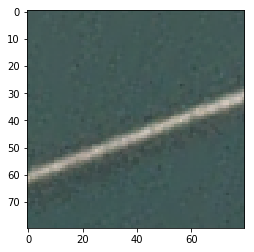

X:1950 Y:2000  [[0.01027112 0.9897288 ]]


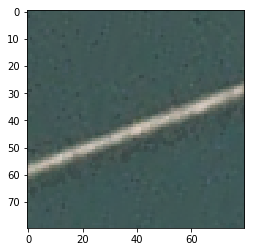

X:1840 Y:2040  [[0.02230349 0.97769654]]


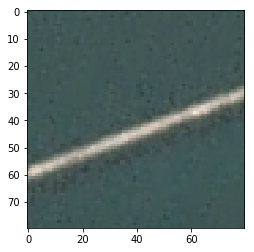

X:830 Y:2070  [[0.09221252 0.90778744]]


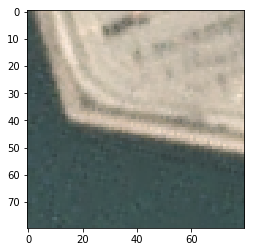

X:1730 Y:2080  [[0.01739804 0.982602  ]]


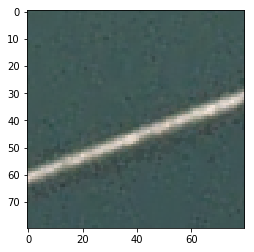

X:920 Y:2090  [[0.00562562 0.9943744 ]]


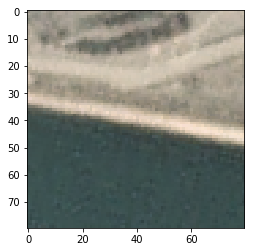

X:1630 Y:2120  [[0.00574838 0.9942516 ]]


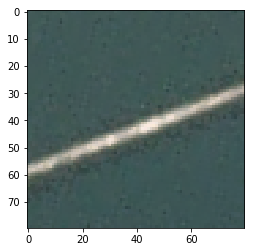

X:280 Y:2130  [[0.03714783 0.9628522 ]]


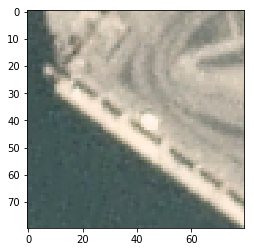

X:1520 Y:2160  [[0.00896598 0.991034  ]]


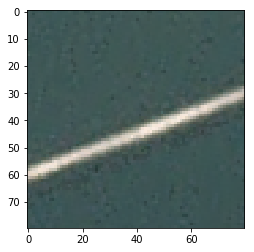

X:1410 Y:2200  [[0.0178715 0.9821285]]


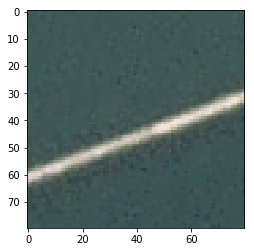

X:1310 Y:2240  [[0.00204971 0.99795026]]


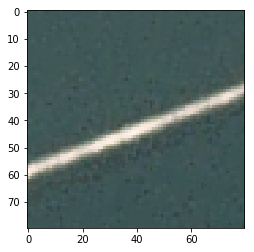

X:1200 Y:2280  [[0.02941764 0.9705823 ]]


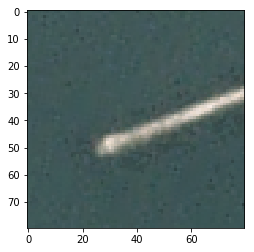

X:100 Y:2350  [[0.07799986 0.9220001 ]]


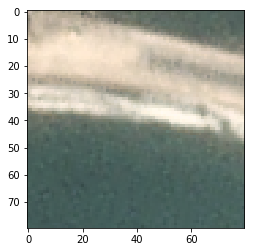

X:960 Y:2370  [[0.04784836 0.9521516 ]]


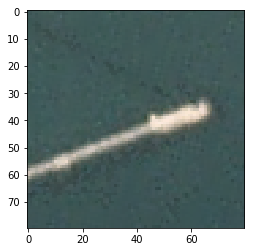

X:250 Y:2390  [[0.01788653 0.9821134 ]]


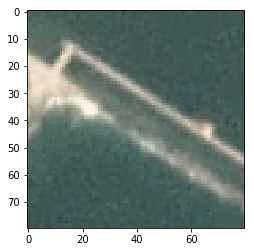

X:850 Y:2410  [[0.08111612 0.9188839 ]]


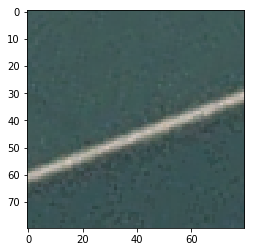

X:750 Y:2450  [[0.01958187 0.9804182 ]]


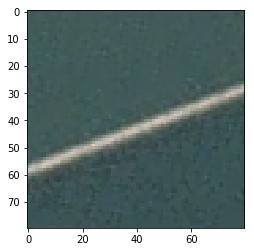

X:650 Y:2490  [[0.03548114 0.9645189 ]]


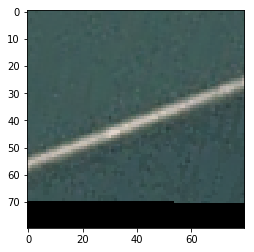

X:6100 Y:2540  

In [77]:
step = 10
coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [2]:
from imageai.Prediction.Custom import ModelTraining

In [3]:
pwd

'C:\\Users\\Ronald Maj\\Documents\\GitHub\\data-analysis-notebooks'

In [4]:
model_trainer = ModelTraining()
model_trainer.setModelTypeAsResNet()
model_trainer.setDataDirectory("ships_sat")
model_trainer.trainModel(num_objects=1, num_experiments=20, enhance_data=True, batch_size=32, show_network_summary=True)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 112, 112, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 64) 0           batch_normalization[0][0]        
__________________________________________________________________________________________________
max_poolin

Found 300 images belonging to 1 classes.
JSON Mapping for the model classes saved to  ships_sat\json\model_class.json
Number of experiments (Epochs) :  20
Epoch 1/20


ValueError: You are passing a target array of shape (32, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.